# Accessioning Rate

SUL doesn't accession media at a constant rate into the SDR. This dataset was created using a report for all media generated from Argo on August 23, 2024.

In [3]:
import pandas

df = pandas.read_csv('../data/media-accessioning.csv', parse_dates=['Accession. Datetime'])
df

/var/folders/zh/9h5yvls57t7fbc7rj3ksh5y00000gr/T/ipykernel_66889/261353291.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pandas.read_csv('../data/media-accessioning.csv', parse_dates=['Accession. Datetime'])


,Druid,Title,Source ID,Admin Policy,Collection,Version,Status,Access Rights,Accession. Datetime,Files,Shelved Files,Preservation Size,Preservation Size (bytes)
0,bb010dx6027,The rite of spring : The nightingale,sul:naxos_nac_8.557501,ARS,NaN,5,Accessioned,dark,2020-11-23 14:35:00,80,0,949 MB,995580812
1,bb012th8016,Symphonies nos. 3 and 4,sul:naxos_nac_8.553739,ARS,NaN,3,Accessioned,dark,2020-11-03 15:39:00,14,0,857 MB,898331378
2,bb012xz4244,The Virtue of Hard Situations,sul:SC1209_3075,Stanford University Libraries - University Arc...,"Stanford Technology Ventures Program, Entrepre...",2,Accessioned,world,2017-11-08 21:21:00,2,1,450 MB,472271502
3,bb015cf9132,Dies sind die heil’gen zehn Gebot (à 2 Clav. e...,sul:ars0021_201006112000_memchu_11,ARS,Stanford Recital Tape Collection,3,Accessioned,world (no-download),2020-04-01 10:45:00,1,1,11.8 MB,12345677
4,bb017yj7594,"#6 Bangladesh 6 - Kmart Group factory, Chatrve...",sul:M2508_s05_b32_562,Stanford University Libraries - Special Collec...,"Reese Erlich papers, circa 1931-2001",2,Accessioned,location: spec (no-download),2023-05-18 13:45:00,12,5,4.13 GB,4436405168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67065,zz976vg4575,"Gyorgy Ligeti, Merkin Hall Concert, New York 1...",sul:ars0032_b3_32,ARS,Judith Rosen Collection,4,Accessioned,location: ars,2020-04-13 16:06:00,12,5,4.33 GB,4645628812
67066,zz987cq7213,2005-06 Events: IDA 2nd Lecture,sul:SC1179_b09_27,Stanford University Libraries - University Arc...,"Stanford University, Institute for Diversity i...",1,Accessioned,world,2018-02-16 22:47:00,6,3,10.6 GB,11367403532
67067,zz990jr0359,Kaltenbrunner and defense. Part 11,sul-vt:icjH5260_1930A_1,ICJ Nuremberg Trial Archives,Nuremberg Trial Archives,7,Accessioned,world,2021-07-03 04:41:00,6,2,989 MB,1037144113
67068,zz993vb2658,Untitled (Clancy Hayes paper tapes). no. 1 of 23,sul:ars0030_b103_01,ARS,San Francisco Traditional Jazz Foundation Coll...,3,Accessioned,stanford (no-download),2017-08-15 19:38:00,5,2,1.19 GB,1272616796


In [5]:
counts = df.set_index('Accession. Datetime').resample('ME').count()
counts

,Druid,Title,Source ID,Admin Policy,Collection,Version,Status,Access Rights,Files,Shelved Files,Preservation Size,Preservation Size (bytes)
Accession. Datetime,,,,,,,,,,,,
2013-02-28,944,944,944,944,944,944,944,944,944,944,944,944
2013-03-31,3,3,3,3,3,3,3,3,3,3,3,3
2013-04-30,0,0,0,0,0,0,0,0,0,0,0,0
2013-05-31,2,2,2,2,2,2,2,2,2,2,2,2
2013-06-30,68,68,68,68,68,68,68,68,68,68,68,68
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,534,534,534,534,518,534,534,534,534,534,534,534
2024-05-31,328,328,328,328,240,328,328,328,328,328,328,328
2024-06-30,257,257,257,257,243,257,257,257,257,257,257,257


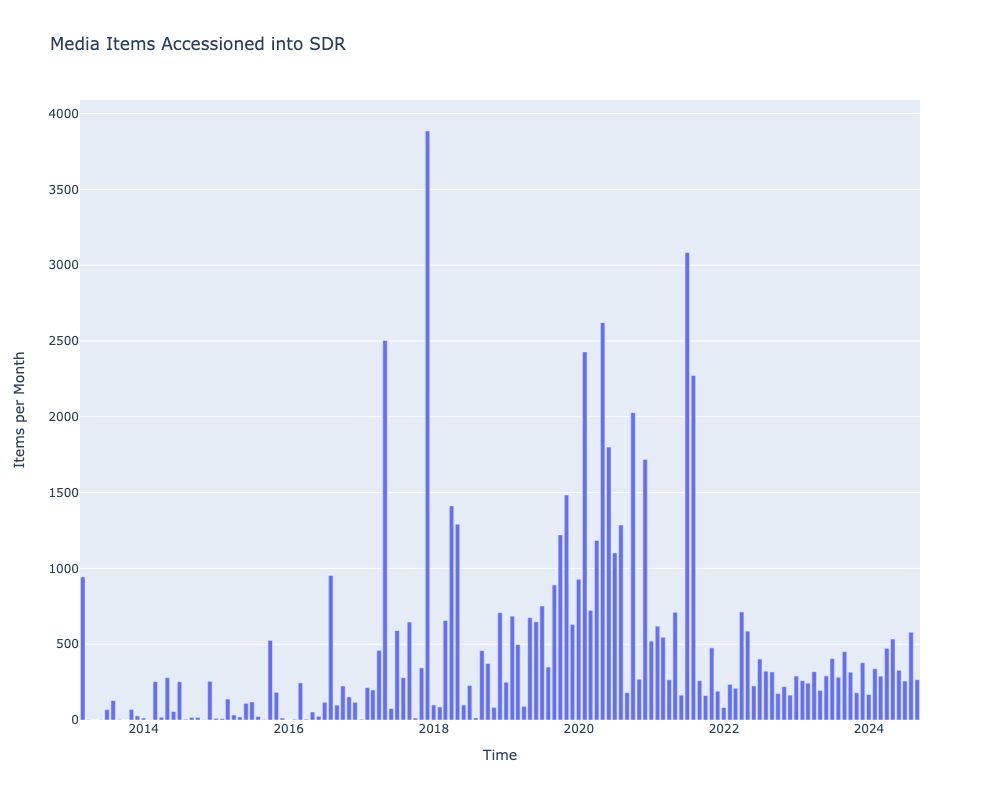

In [21]:
from plotly import express as xp

fig = xp.bar(counts['Druid'], labels={'value': 'Items per Month', 'Accession. Datetime': 'Time'}, title='Media Items Accessioned into SDR', width=1000, height=800)
fig = fig.update_layout(showlegend=False)
fig.show('png')